In [10]:
import pandas as pd

df = pd.read_csv('dataset/pima-indians-diabetes.csv', 
                 names=["pregnant", "plasma", "pressure", "thickness",
                       "insulin", "BMI", "pedigree", "age", "class"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


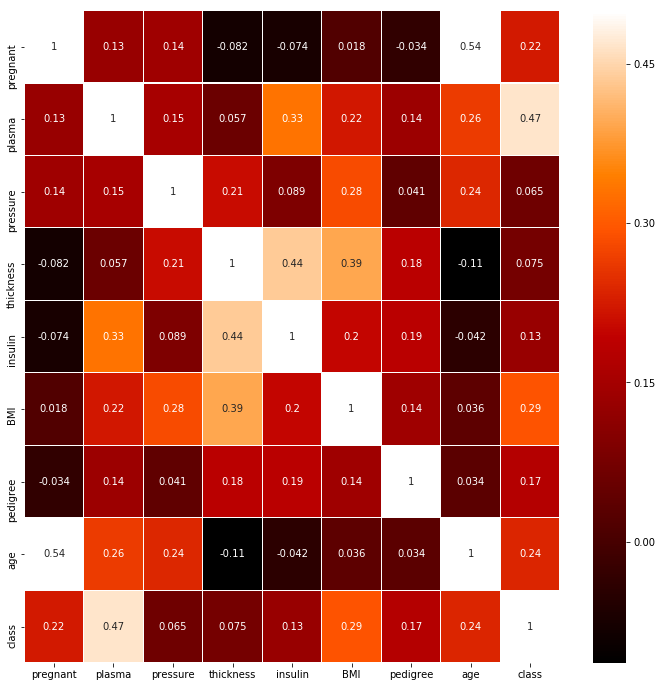

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

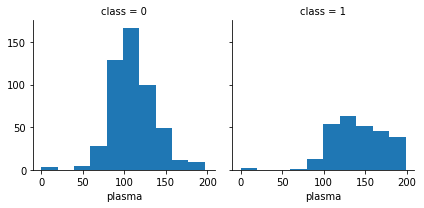

In [21]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense


In [25]:
import numpy as np
import tensorflow as tf

In [27]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [37]:
dataset = df.values
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [39]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
768/768 [==============================] - 0s 616us/step - loss: 2.4217 - acc: 0.5117
Epoch 2/200
768/768 [==============================] - 0s 181us/step - loss: 0.9141 - acc: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 189us/step - loss: 0.7942 - acc: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 183us/step - loss: 0.7407 - acc: 0.6055
Epoch 5/200
768/768 [==============================] - 0s 194us/step - loss: 0.6789 - acc: 0.6419 0s - loss: 0.6878 - acc: 0.63
Epoch 6/200
768/768 [==============================] - 0s 205us/step - loss: 0.6497 - acc: 0.6289
Epoch 7/200
768/768 [==============================] - 0s 195us/step - loss: 0.6379 - acc: 0.6484
Epoch 8/200
768/768 [==============================] - 0s 184us/step - loss: 0.6389 - acc: 0.6224
Epoch 9/200
768/768 [==============================] - 0s 181us/step - loss: 0.6303 - acc: 0.6354
Epoch 10/200
768/768 [==============================] - 0s 187us/step - loss: 0.6213 - a

768/768 [==============================] - 0s 200us/step - loss: 0.5058 - acc: 0.7487
Epoch 83/200
768/768 [==============================] - 0s 172us/step - loss: 0.5228 - acc: 0.7383
Epoch 84/200
768/768 [==============================] - 0s 165us/step - loss: 0.5033 - acc: 0.7474
Epoch 85/200
768/768 [==============================] - 0s 164us/step - loss: 0.5071 - acc: 0.7500
Epoch 86/200
768/768 [==============================] - 0s 167us/step - loss: 0.5090 - acc: 0.7526
Epoch 87/200
768/768 [==============================] - 0s 182us/step - loss: 0.5138 - acc: 0.7474
Epoch 88/200
768/768 [==============================] - 0s 193us/step - loss: 0.5110 - acc: 0.7370
Epoch 89/200
768/768 [==============================] - 0s 164us/step - loss: 0.5063 - acc: 0.7617
Epoch 90/200
768/768 [==============================] - ETA: 0s - loss: 0.5053 - acc: 0.751 - 0s 161us/step - loss: 0.5013 - acc: 0.7539
Epoch 91/200
768/768 [==============================] - 0s 164us/step - loss: 0.4984

768/768 [==============================] - 0s 388us/step - loss: 0.4655 - acc: 0.7669
Epoch 164/200
768/768 [==============================] - 0s 191us/step - loss: 0.4692 - acc: 0.7760
Epoch 165/200
768/768 [==============================] - 0s 197us/step - loss: 0.4725 - acc: 0.7565
Epoch 166/200
768/768 [==============================] - 0s 186us/step - loss: 0.4692 - acc: 0.7786
Epoch 167/200
768/768 [==============================] - 0s 198us/step - loss: 0.4790 - acc: 0.7591
Epoch 168/200
768/768 [==============================] - 0s 227us/step - loss: 0.4644 - acc: 0.7799
Epoch 169/200
768/768 [==============================] - 0s 196us/step - loss: 0.4721 - acc: 0.7656
Epoch 170/200
768/768 [==============================] - 0s 216us/step - loss: 0.4671 - acc: 0.7734
Epoch 171/200
768/768 [==============================] - 0s 179us/step - loss: 0.4676 - acc: 0.7669
Epoch 172/200
768/768 [==============================] - 0s 218us/step - loss: 0.4708 - acc: 0.7630
Epoch 173/200


In [41]:
print("Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

768/768 [==============================] - 0s 117us/step
Accuracy: 0.7773
